# Dynamic mode decomposition on a linear system
We apply dynamic mode decomposition (DMD) to a spatiotemporal, linear system,
which is created as a superposition from two mixed spatiotemporal signals
(this is example 1.4 in Kutz et al., _"Dynamic Mode Decomposition"_, SIAM 2016):

$$f(x,t) = f_1(x,t) + f_2(x,t)$$

whith

$$f_1(x,t) = \mathrm{sech}(x+3) e^{j2.3t}$$ and <br>
$$f_1(x,t) = 2\,\mathrm{sech}(x)\,\mathrm{tanh}(x) e^{j2.8t}$$.

These two individual signals have frequencies $$\omega_1 = 2.3$$ and $$\omega_2=2.8$$
with each a distinct spatial structure.

We first import the pyKoopman package and other packages for plotting and matrix manipulation.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import pykoopman as pk

Time and space discretizations

In [3]:
tArray = np.linspace(0, 4*np.pi, 200)  # Time array for solution
dt = tArray[1]-tArray[0] # Time step
xArray = np.linspace(-10,10,400)
[Xgrid, Tgrid] = np.meshgrid(xArray, tArray)


Define helper function, hyperbolic secant

In [7]:
def sech(x):
    return 1/np.cosh(x)

Generate training data from two spatiotemporal signals

In [12]:
f1 = np.multiply(sech(Xgrid+3), np.exp(1j*2.3*Tgrid))
f2 = np.multiply( np.multiply(sech(Xgrid), np.tanh(Xgrid)), 2*np.exp(1j*2.8*Tgrid))
f = f1 + f2

Text(0.5, 0, '$t$')

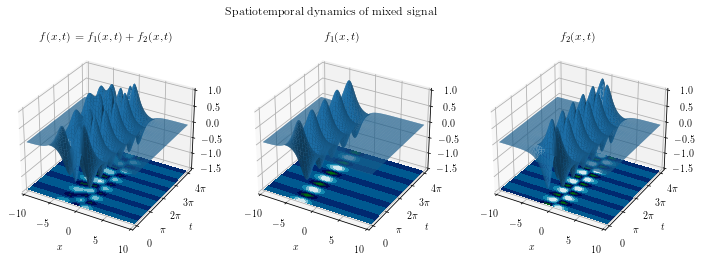

In [87]:
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,4))
fig.suptitle('Spatiotemporal dynamics of mixed signal')

time_ticks = np.array([0, 1*np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
time_labels = ('0', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$')

ax = fig.add_subplot(1, 3, 1, projection='3d')
surf = ax.plot_surface(Xgrid, Tgrid, f, rstride=1)
cset = ax.contourf(Xgrid, Tgrid, f, zdir='z', offset=-1.5, cmap=cm.ocean)
ax.set_yticks(time_ticks)
ax.set_yticklabels(time_labels)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim(-10,10)
ax.set_zlim(-1.5,1)
ax.set_title(r'$f(x,t)=f_1(x,t)+f_2(x,t)$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$t$')

ax = fig.add_subplot(1, 3, 2, projection='3d')
surf = ax.plot_surface(Xgrid, Tgrid, f1, rstride=1)
cset = ax.contourf(Xgrid, Tgrid, f1, zdir='z', offset=-1.5, cmap=cm.ocean)
ax.set_yticks(time_ticks)
ax.set_yticklabels(time_labels)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim(-10,10)
ax.set_zlim(-1.5,1)
ax.set_title(r'$f_1(x,t)$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$t$')

ax = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax.plot_surface(Xgrid, Tgrid, f2, rstride=1)
cset = ax.contourf(Xgrid, Tgrid, f2, zdir='z', offset=-1.5, cmap=cm.ocean)
ax.set_yticks(time_ticks)
ax.set_yticklabels(time_labels)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim(-10,10)
ax.set_zlim(-1.5,1)
ax.set_title(r'$f_2(x,t)$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$t$')

Instantiate and fit a Koopman model using DMD on training data

In [98]:
from sklearn.preprocessing import PolynomialFeatures
Xdat = np.array([0,1,2,3])
Xdat = Xdat[:, np.newaxis]
features = PolynomialFeatures(1)
features.fit(Xdat)
print(features.get_feature_names())
print(features.fit_transform(Xdat))

['1', 'x0']
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]]


In [89]:
model = pk.pyKoopman()
model.fit(X_train, dt=dt)


AttributeError: module 'pykoopman' has no attribute 'pyKoopman'